<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_7_Regresi%C3%B3n_Polin%C3%B3mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso 7: Regresión Polinómica

Yander Alexis Avila Medina
05-Oct-2021

##Objetivo
Desarrollar predicciones y evaluación del modelo de regresión polinómica y comparar con el modelo de regresión simple

##Descripción
Se elabora un modelo de regresión lineal simple y se compara con un modelo de regresión polinómica confirme y de acuerdo al valor R Square o Coeficiente de Determinación

Los datos se obtienen de [Kaggle](https://www.kaggle.com/akram24/position-salaries)

La fuente originial del ejemplo se encuentra en [link](https://www.ellaberintodefalken.com/2019/12/regresion-polinomica-polinomial.html)

*  Primero se crea un modelo de regresión lineal simple
*  Se visualizan diagramas de dispersión
*  Se comparan los modelos confirme al estadístico R Square
*  Se crea un modelo de regresión polinómica de tercer nivel
*  Se hacen interpretaciones del caso


##Marco Teórico

Los modelos lineales tienen la ventaja de ser fácilmente interpretables, sin embargo, pueden tener limitaciones importantes en capacidad predictiva, esto se debe a que, la asunción de linealidad, es con frecuencia una aproximación demasiado simple para describir las relaciones reales entre variables. 

La forma más sencilla de incorporar flexibilidad a un modelo lineal es introduciendo nuevos predictores obtenidos al elevar a distintas potencias el predictor original.

Partiendo del modelo lineal:

$y=β0+β1xi+ϵi$

Ahora se pretendie una ecuación polinomial:

$y=β0+β1xi+β2xi2+β3xi3...+βnxin+ϵi$

##Desarrollo

##Cargar los datos

In [1]:
import pandas as pd

datos = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Position_Salaries.csv')

datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


##Crear el modelo de regresión lineal

In [6]:
from matplotlib import pyplot as plt

#Convertir los datos en arreglos independientes
x = datos['Level'].values.reshape(-1, 1)#Variable independiente
y = datos['Salary'].values.reshape(-1, 1)# Variable dependiente

print(x , '\n\n', y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

 [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


###Visualizar datos
Se construye la gráfica de dispersión con los datos

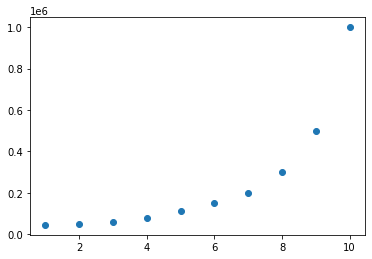

In [7]:
plt.scatter(x, y)

###Crear modelo de regresión lineal simple

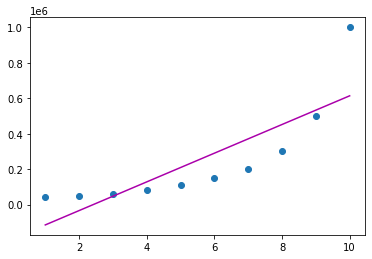

In [9]:
from sklearn.linear_model import LinearRegression

modelo_lin = LinearRegression()
modelo_lin.fit(x, y)
y_pred = modelo_lin.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='#AA00AA')
plt.show()

Se puede ver como el modelo de regresión lineal no se ajusta al conjunto de datos actual donde en cada nivel hay un aumento progresivo en vez de una acumulacion en varios puntos para poder formar algo parecido a un camino recto.

Utilizar otro modelo sería una mejor solución para este análisis.

###Evaluación del modelo con R Square

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 163388.73519272613
R2: 0.6690412331929895


###Coeficientes en el modelo de regresión lineal simple

In [14]:
b0 = modelo_lin.intercept_
b1 = modelo_lin.coef_

print('B0:', b0)
print('B1:', b1)

B0: [-195333.33333333]
B1: [[80878.78787879]]


$y=b0+b1xi$
$y.prediccion=−195333.3333333+80878.78787879×level$


###Predecir un valor de 5 conforme a la fórmula

In [15]:
prediccion = -195333.3333333 + 80878.78787879 * 5
print(prediccion)

209060.60606065


###Predicir un valor de 5 confirma la función predict()

In [16]:
pred = modelo_lin.predict([[5]])
print(pred)

[[209060.60606061]]


##Modelo de regresión polinómica al cuadrado

De acuerdo al modelo de regresión lineal simple, la variable independiente *Level* representa el 66.9% la variable dependiente *Salary*

In [17]:
from sklearn.preprocessing import PolynomialFeatures

polyn = PolynomialFeatures(degree = 2)

x_poly = polyn.fit_transform(x)
print(x)
print(x_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


###Modelo polinómico ajustado al cuadrado

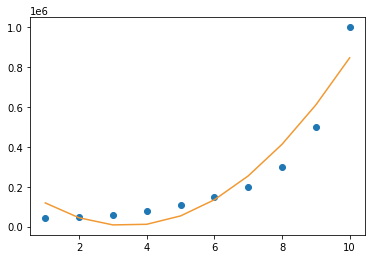

RMSE: 82212.12400451249
R2: 0.9162082221443942


In [38]:
modelo_pol2 = LinearRegression()
modelo_pol2.fit(x_poly, y)

y_pred = modelo_pol2.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred, color="#F19933")
plt.show()

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('RMSE:', rmse)
print('R2:', r2)

Ahora con el modelo de regresión polinómica se puede ver como este modelo se ajusta mejor a los datos dando a entender que las predicción posiblemente sean buenas y esto lo podemos confirmar con el R Square ya que nos arroja un 91.6% que significa que tanto representa la variable independiente **level** a la variable dependiente **salary**.

##Coeficientes en el modelo de regresión polinómica al cuadrado

In [39]:
b0 = modelo_pol2.intercept_
b1 = modelo_pol2.coef_

print("B0:", b0)
print("B1:", b1)

B0: [232166.66666667]
B1: [[      0.         -132871.21212121   19431.81818182]]


$y=β0+β1xi+β2xi2+β3xi3...+βnxin+ϵi$

###Predecir conforme a la fórmula
Valor de level igual a 5

In [41]:
prediccion = 232166.66666667 + (-132871.21212121 * 5) + (19431.81818182 * pow(5, 2))
print(prediccion)

53606.06060611992


In [42]:
pred = modelo_pol2.predict(polyn.fit_transform([[5]]))
print(pred)

[[53606.06060606]]


##Modelo polinómico ajustado al cubo

In [43]:
polyn3 = PolynomialFeatures(degree = 3)

x_poly3 = polyn3.fit_transform(x)
print(x)
print(x_poly3)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


###Modelo polinómico al cubo

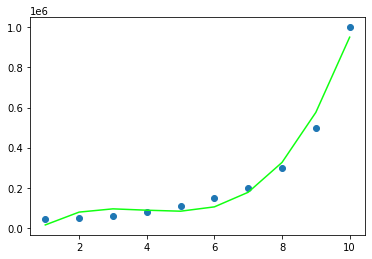

RMSE: 38931.50401232919
R2: 0.9812097727913367


In [44]:
modelo_pol3 = LinearRegression()
modelo_pol3.fit(x_poly3, y)

y_pred = modelo_pol3.predict(x_poly3)

plt.scatter(x, y)
plt.plot(x, y_pred, color='#11FF11')
plt.show()

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('RMSE:', rmse)
print('R2:', r2)

Haciendo uso del modelo de regresión polinómico de nivel 3 podemos observar que se ajusta más a los datos que el modelo de nivel 2

###Coeficientes en el modelo de regresión polinómica al cubo

In [45]:
b0 = modelo_pol3.intercept_
b1 = modelo_pol3.coef_

print("B0:", b0)
print("B1:", b1)

B0: [-121333.33333331]
B1: [[     0.         180664.33566432 -48548.95104895   4120.04662005]]


###Predecir

####Predecir confirme a la fórmula
Valor de Level = 5

In [46]:
prediccion = -121333.33333331 + (180664.33566432 * 5) + (-48548.95104895 * pow(5, 2) + (4120.04662005 * pow(5, 3)))
print(prediccion)

83270.39627079002


####Predecir confirme a la función predict()

In [47]:
pred = modelo_pol3.predict(polyn3.fit_transform([[5]]))
print(pred)

[[83270.39627039]]


#Interpretación

De los dos modelos vistos (Lineal y Polinómico) el modelo de regresión polinómica es el adecuado para poder llevar a cabo un análisis además de que tiene un 91.6% de precisión en la prediccion de **salary**.

Aunque usando este modelo de nivel **2** es bueno para poder llegar a sacar predicciones que se asemejan a los datos reales, es posible haya un mejor modelo que se ajuste con mayor precisión al conjunto de datos.

Haciendo uso del modelo de regresión polinómica de nivel 3 se puede observar como se ajusta mejor a los datos que el modelo de nivel 2, a tal grado se ajusta que el porcentaje de predicción que se acerca a los valores reales es de 98.1%, de esta forma se tiene un mejor análisis.

Aunque el conjunto de datos tiene muy pocos registros aun nos sirve para poder hacer pruebas y ver como haciendo uso de diferentes modelos nos podemos acercar al nivel de precisión que buscamos y llegará un punto que un modelo nos será util para hacer un análisis completo y predicciones más precisas.